In [1]:
import numpy as np
import pandas as pd
import psycopg2

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd
from sqlalchemy import create_engine

# Database connection parameters
db_params = {
    'dbname': 'week1',
    'user': 'postgres',
    'password': 'habte',
    'host': 'localhost',
    'port': '5432'
}

# Create a SQLAlchemy engine
engine = create_engine(f'postgresql+psycopg2://{db_params["user"]}:{db_params["password"]}@{db_params["host"]}:{db_params["port"]}/{db_params["dbname"]}')

# SQL query to retrieve data
sql_query = "SELECT * FROM xdr_data;"

# Read data from PostgreSQL into a DataFrame
mydata = pd.read_sql_query(sql_query, engine)

In [6]:
# General Overview
print(mydata.shape)

(150001, 55)


In [6]:
print(mydata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

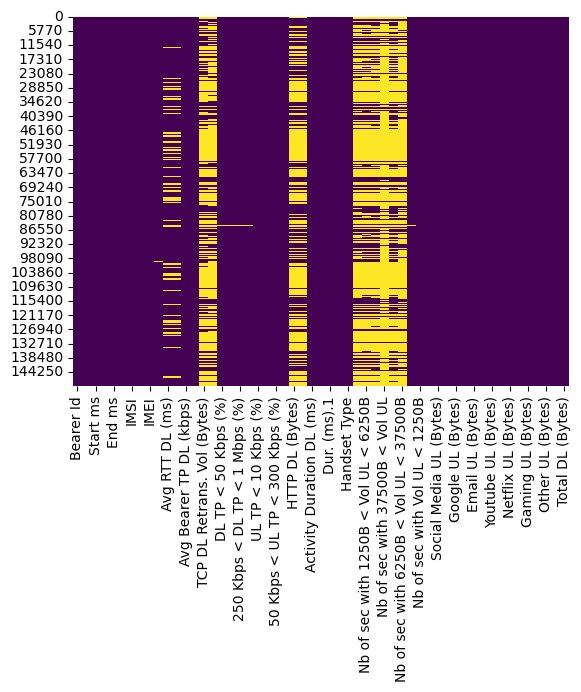

In [7]:
sns.heatmap(mydata.isnull(), cbar=False, cmap='viridis')
plt.show()

In [8]:
missing_percentage = mydata.isnull().mean() * 100
print(missing_percentage)

Bearer Id                                    0.660662
Start                                        0.000667
Start ms                                     0.000667
End                                          0.000667
End ms                                       0.000667
Dur. (ms)                                    0.000667
IMSI                                         0.379997
MSISDN/Number                                0.710662
IMEI                                         0.381331
Last Location Name                           0.768662
Avg RTT DL (ms)                             18.552543
Avg RTT UL (ms)                             18.541210
Avg Bearer TP DL (kbps)                      0.000667
Avg Bearer TP UL (kbps)                      0.000667
TCP DL Retrans. Vol (Bytes)                 58.763608
TCP UL Retrans. Vol (Bytes)                 64.432237
DL TP < 50 Kbps (%)                          0.502663
50 Kbps < DL TP < 250 Kbps (%)               0.502663
250 Kbps < DL TP < 1 Mbps (%

In [7]:
top_10_summary = mydata.head(10).describe(include='all')
print(top_10_summary)

           Bearer Id           Start    Start ms              End      End ms  \
count   1.000000e+01              10   10.000000               10   10.000000   
unique           NaN              10         NaN               10         NaN   
top              NaN  4/4/2019 12:01         NaN  4/25/2019 14:35         NaN   
freq             NaN               1         NaN                1         NaN   
mean    1.310007e+19             NaN  382.100000              NaN  552.200000   
std     3.038214e+16             NaN  274.046407              NaN  282.670912   
min     1.304243e+19             NaN    0.000000              NaN  168.000000   
25%     1.311448e+19             NaN  149.500000              NaN  341.000000   
50%     1.311448e+19             NaN  462.500000              NaN  579.500000   
75%     1.311448e+19             NaN  585.250000              NaN  659.500000   
max     1.311448e+19             NaN  770.000000              NaN  960.000000   

           Dur. (ms)       

In [4]:
#Explore the Distribution of Activity Types:
activity_columns = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)',
                    'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
                    'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
                    'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
                    'Other DL (Bytes)', 'Other UL (Bytes)']

activity_data = mydata[activity_columns]

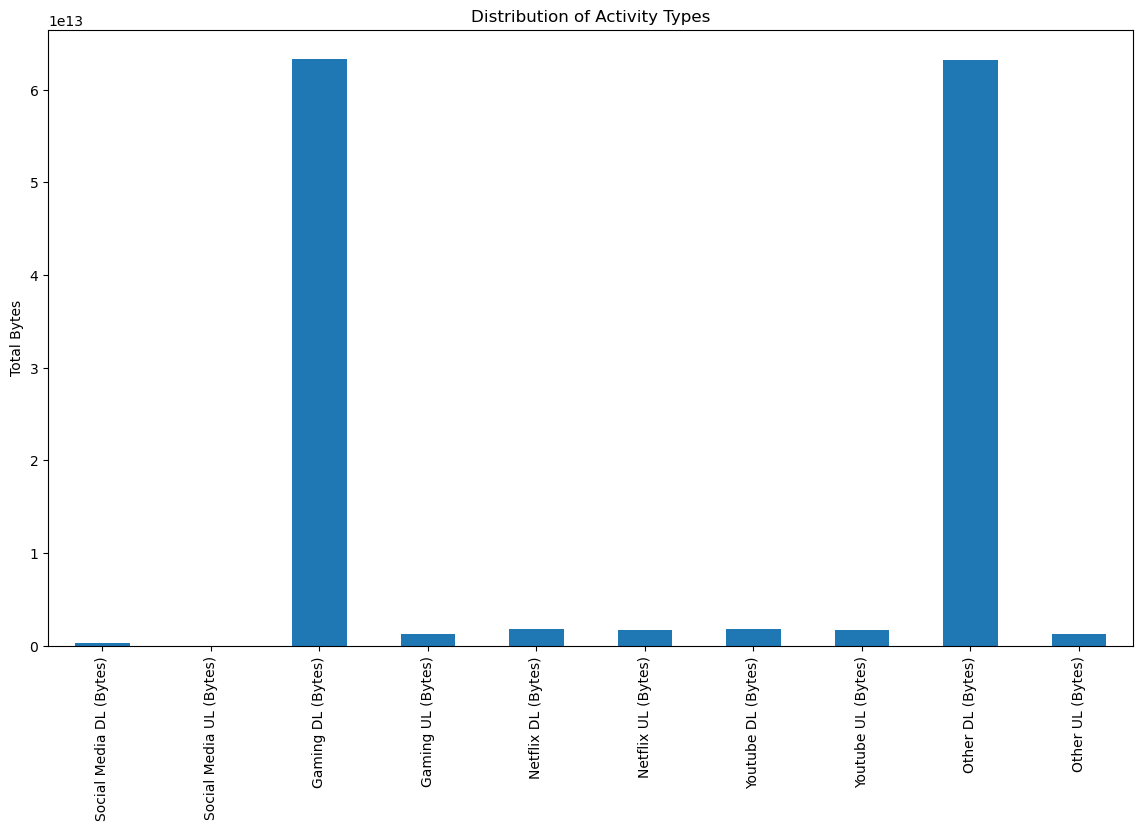

In [5]:

plt.figure(figsize=(14, 8))
activity_data.sum().plot(kind='bar')
plt.title('Distribution of Activity Types')
plt.ylabel('Total Bytes')
plt.show()

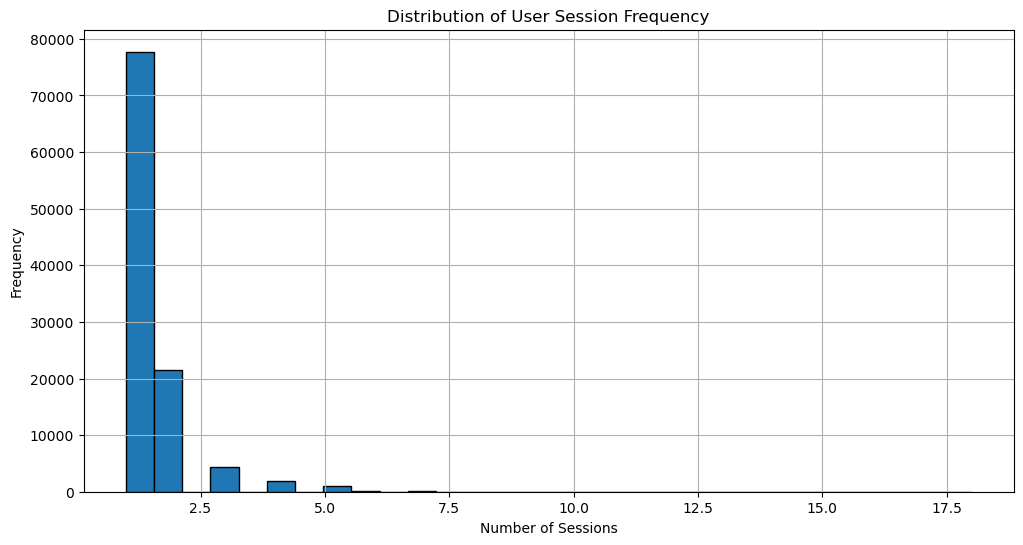

In [8]:
#Analyze the Frequency of User Sessions
session_frequency = mydata['MSISDN/Number'].value_counts()

plt.figure(figsize=(12, 6))
session_frequency.hist(bins=30, edgecolor='black')
plt.title('Distribution of User Session Frequency')
plt.xlabel('Number of Sessions')
plt.ylabel('Frequency')
plt.show()

/home/habte/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


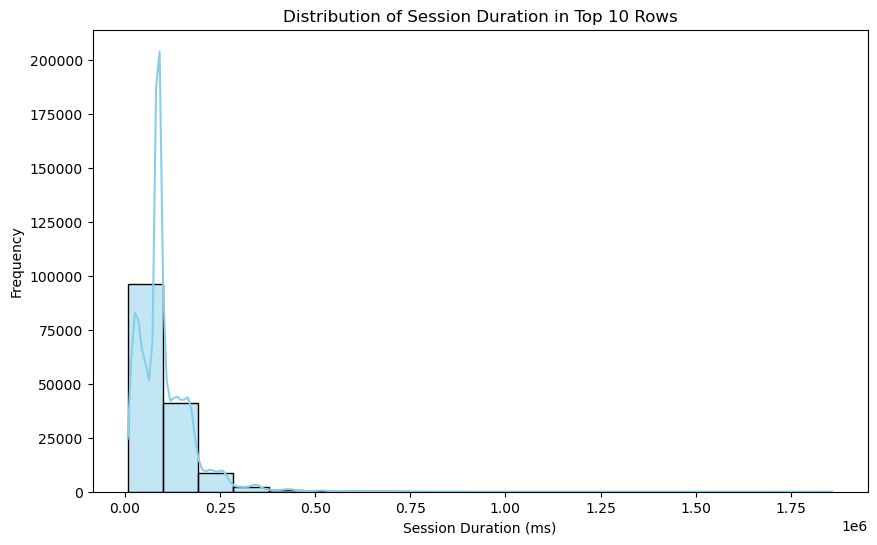

In [8]:
# Set up the plotting environment
plt.figure(figsize=(10, 6))

# Plot a histogram for the session duration
sns.histplot(mydata['Dur. (ms)'], bins=20, kde=True, color='skyblue')

# Set labels and title
plt.xlabel('Session Duration (ms)')
plt.ylabel('Frequency')
plt.title('Distribution of Session Duration in Top 10 Rows')

# Display the plot
plt.show()


In [6]:
# Input missing values for selected columns
columns_to_input = ['Start', 'End', 'Dur. (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']

for column in columns_to_input:
    # Check for the column has a numeric data type
    if pd.api.types.is_numeric_dtype(mydata[column]):
        # Input missing values with the mean for numeric columns
        mydata[column].fillna(mydata[column].mean(), inplace=True)
    else:
        # Handle non-numeric columns differently 
        mydata[column].fillna(method='ffill', inplace=True)


/tmp/ipykernel_4035/1482876753.py:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  mydata[column].fillna(method='ffill', inplace=True)


In [7]:
columns_to_input 

['Start',
 'End',
 'Dur. (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)']

In [8]:
#Calculate the Total Number of Unique Users
total_users = mydata['MSISDN/Number'].nunique()
print("Total Number of Unique Users:", total_users)

Total Number of Unique Users: 106856


In [10]:
# Identify the top 10 handsets used by customers
top_10_handsets = mydata['Handset Type'].value_counts().head(10)

# Display the top 10 handsets
print("Top 10 Handsets Used by Customers:")
print(top_10_handsets)


Top 10 Handsets Used by Customers:
Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


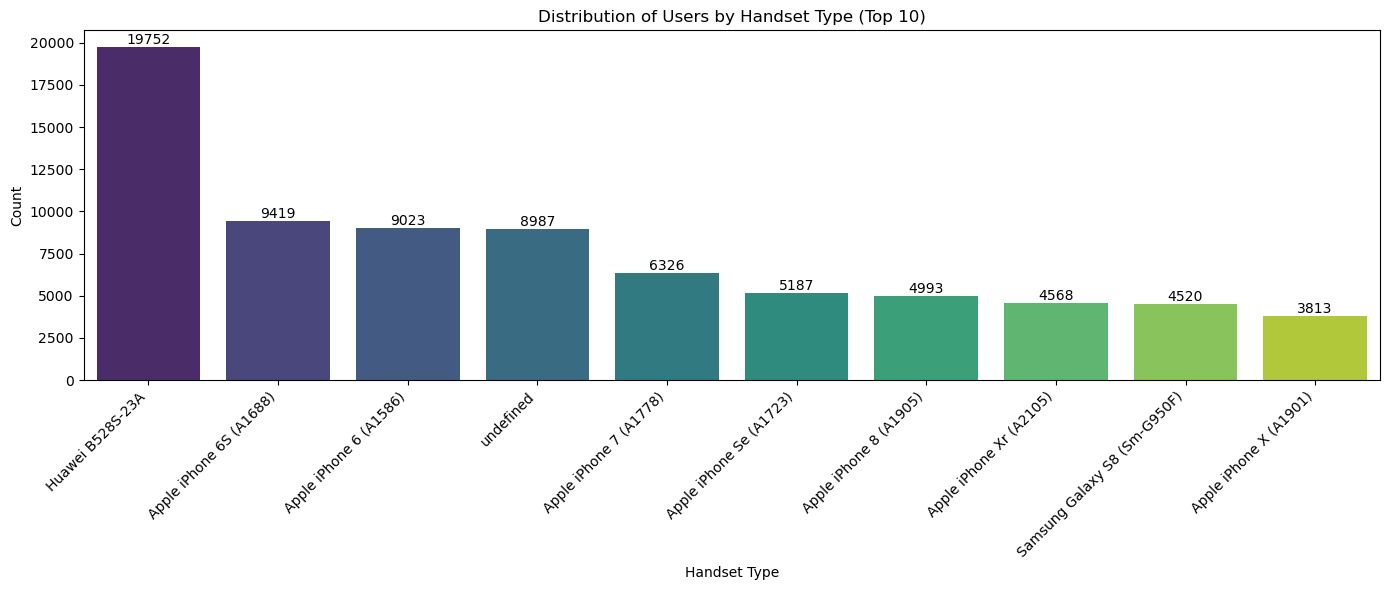

In [16]:
# Get the top 10 handset types
top_10_handsets = mydata['Handset Type'].value_counts().head(10).index

# Filter the DataFrame for only the top 10 handset types
mydata_top_10 = mydata[mydata['Handset Type'].isin(top_10_handsets)]

plt.figure(figsize=(14, 6))
sns.countplot(x='Handset Type', data=mydata_top_10, order=top_10_handsets, palette='viridis')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

for index, value in enumerate(mydata_top_10['Handset Type'].value_counts()):
    plt.text(index, value + 0.1, f"{value}", ha='center', va='bottom')  # Fix syntax here

plt.title('Distribution of Users by Handset Type (Top 10)')
plt.xlabel('Handset Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()



In [17]:
#Calculate the Average Duration of User Sessions
average_duration = mydata['Dur. (ms)'].mean()
print("Average Duration of User Sessions (in ms):", average_duration)

Average Duration of User Sessions (in ms): 104608.56034666667


In [20]:
# Identify the top 3 handset manufacturers
top_3_manufacturers = mydata['Handset Manufacturer'].value_counts().head(3).index

# Filter the DataFrame for only the top 3 handset manufacturers
mydata_top_3_manufacturers = mydata[mydata['Handset Manufacturer'].isin(top_3_manufacturers)]

# Identify the top 5 handsets per top 3 handset manufacturer
top_5_handsets_per_manufacturer = (
    mydata_top_3_manufacturers.groupby('Handset Manufacturer')['Handset Type']
    .value_counts()
    .groupby(level=0, group_keys=False)
    .nlargest(5)
    .reset_index(name='Count')
)

# Display the top 5 handsets per top 3 handset manufacturer
print("Top 5 Handsets per Top 3 Handset Manufacturers:")
print(top_5_handsets_per_manufacturer)


Top 5 Handsets per Top 3 Handset Manufacturers:
   Handset Manufacturer                    Handset Type  Count
0                 Apple         Apple iPhone 6S (A1688)   9419
1                 Apple          Apple iPhone 6 (A1586)   9023
2                 Apple          Apple iPhone 7 (A1778)   6326
3                 Apple         Apple iPhone Se (A1723)   5187
4                 Apple          Apple iPhone 8 (A1905)   4993
5                Huawei                Huawei B528S-23A  19752
6                Huawei                    Huawei E5180   2079
7                Huawei  Huawei P20 Lite Huawei Nova 3E   2021
8                Huawei                      Huawei P20   1480
9                Huawei                  Huawei Y6 2018    997
10              Samsung    Samsung Galaxy S8 (Sm-G950F)   4520
11              Samsung      Samsung Galaxy A5 Sm-A520F   3724
12              Samsung     Samsung Galaxy J5 (Sm-J530)   3696
13              Samsung     Samsung Galaxy J3 (Sm-J330)   3484
14     

In [21]:
# Identify the top 3 handset manufacturers
top_3_manufacturers = mydata['Handset Manufacturer'].value_counts().head(3)

# Display the top 3 handset manufacturers
print("Top 3 Handset Manufacturers:")
print(top_3_manufacturers)


Top 3 Handset Manufacturers:
Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


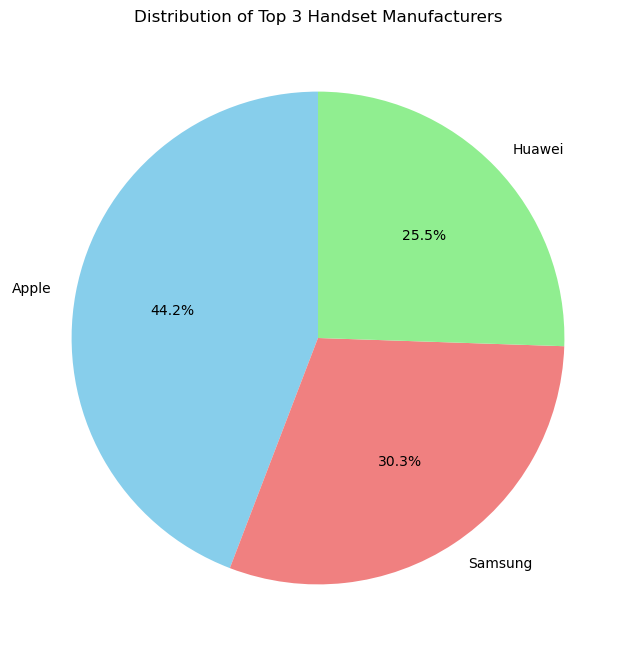

In [14]:
# top 3 handset manufacturers data
data = {
    'Handset Manufacturer': ['Apple', 'Samsung', 'Huawei'],
    'Count': [59565, 40839, 34423]
}

df = pd.DataFrame(data)

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(df['Count'], labels=df['Handset Manufacturer'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Distribution of Top 3 Handset Manufacturers')
plt.show()


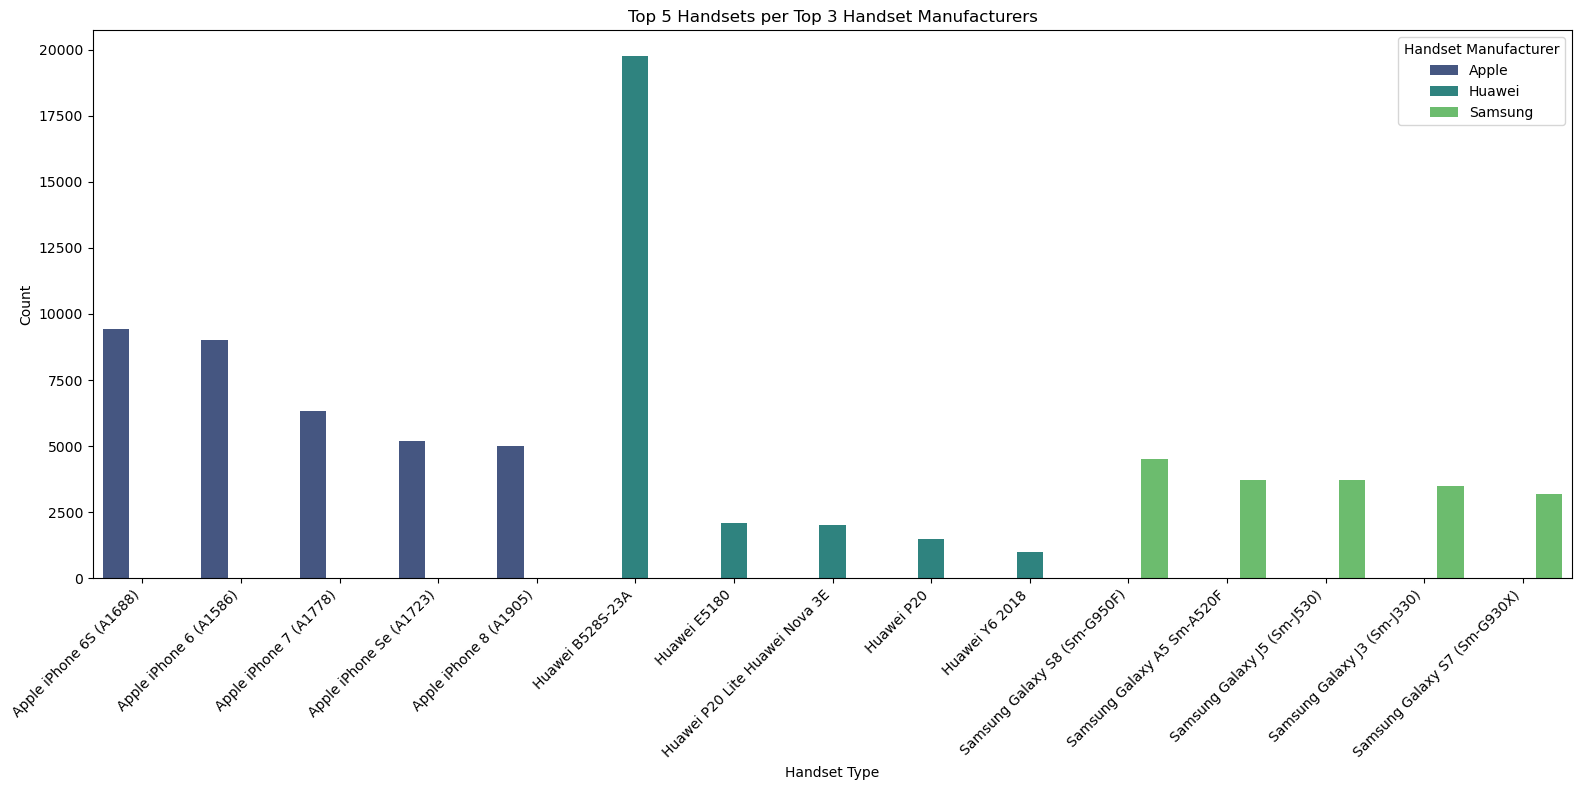

In [22]:
# Plot the distribution of users by handset type for each top 3 manufacturer
plt.figure(figsize=(16, 8))
sns.barplot(x='Handset Type', y='Count', hue='Handset Manufacturer', data=top_5_handsets_per_manufacturer, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Top 5 Handsets per Top 3 Handset Manufacturers')
plt.xlabel('Handset Type')
plt.ylabel('Count')
plt.tight_layout()
plt.legend(title='Handset Manufacturer')
plt.show()

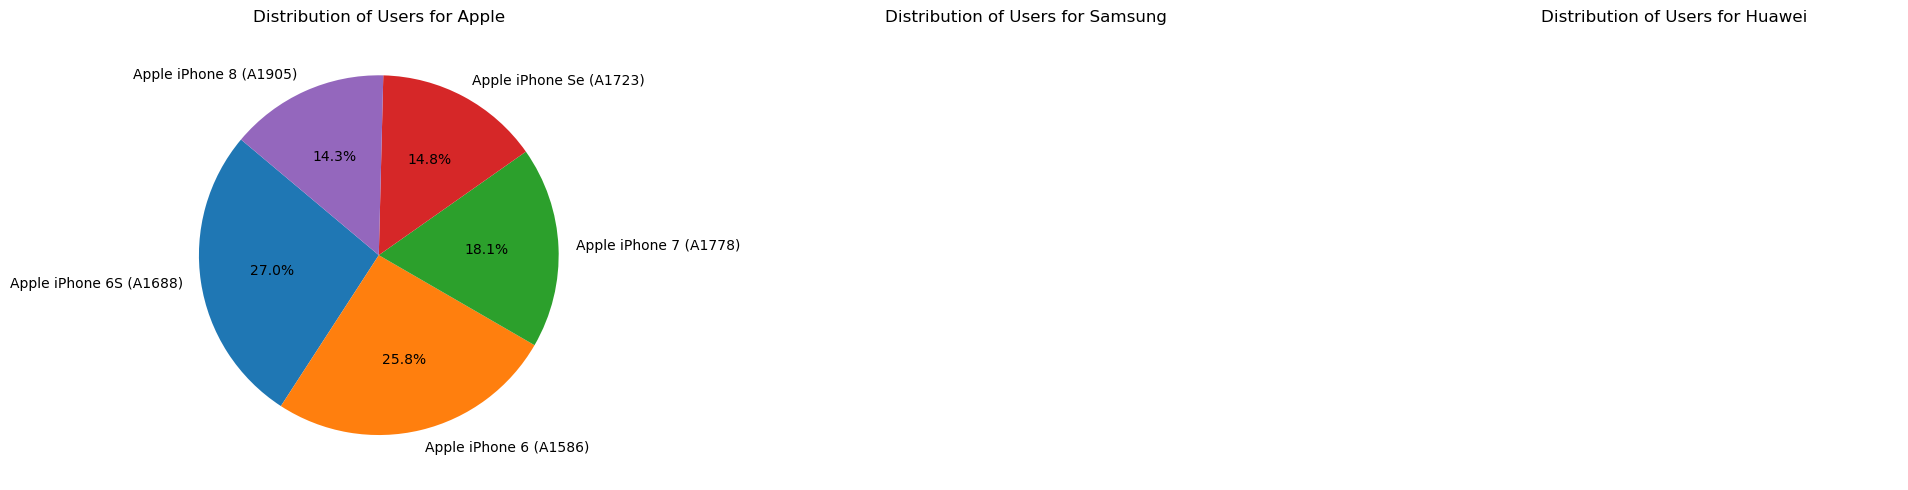

In [13]:
# Your top 5 handsets per top 3 manufacturers data
data = {
    'Handset Type': ['Apple iPhone 6S (A1688)', 'Apple iPhone 6 (A1586)', 'Apple iPhone 7 (A1778)', 'Apple iPhone Se (A1723)', 'Apple iPhone 8 (A1905)'],
    'Count': [9419, 9023, 6326, 5187, 4993]
}

df = pd.DataFrame(data)

# Plot pie charts for each manufacturer
manufacturers = ['Apple', 'Samsung', 'Huawei']

plt.figure(figsize=(20, 5))

for i, manufacturer in enumerate(manufacturers, 1):
    plt.subplot(1, 3, i)
    
    # Filter data for the specific manufacturer
    manufacturer_data = df[df['Handset Type'].str.contains(manufacturer)]
    
    # Plot pie chart
    plt.pie(manufacturer_data['Count'], labels=manufacturer_data['Handset Type'], autopct='%1.1f%%', startangle=140)
    
    # Set title
    plt.title(f'Distribution of Users for {manufacturer}')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [24]:
# Group by 'MSISDN/Number' and calculate the number of xDR sessions for each user
user_xdr_sessions = mydata.groupby('MSISDN/Number')['Bearer Id'].count().reset_index(name='Number_of_xDR_sessions')

# Display the aggregated information
print("Aggregated Information - Number of xDR Sessions per User:")
print(user_xdr_sessions)


Aggregated Information - Number of xDR Sessions per User:
        MSISDN/Number  Number_of_xDR_sessions
0        3.360100e+10                       1
1        3.360100e+10                       1
2        3.360100e+10                       1
3        3.360101e+10                       1
4        3.360101e+10                       2
...               ...                     ...
106851   3.379000e+10                       1
106852   3.379000e+10                       1
106853   3.197021e+12                       1
106854   3.370000e+14                       1
106855   8.823971e+14                       1

[106856 rows x 2 columns]


In [13]:
# Convert 'Start' and 'End' columns to datetime objects
mydata['Start'] = pd.to_datetime(mydata['Start'])
mydata['End'] = pd.to_datetime(mydata['End'])

In [14]:
# Calculate session duration
mydata['Session_Duration'] = (mydata['End'] - mydata['Start']).dt.total_seconds()

In [15]:
# Group by 'MSISDN/Number' and aggregate session duration
user_session_duration = mydata.groupby('MSISDN/Number')['Session_Duration'].sum().reset_index(name='Total_Session_Duration')

In [16]:
# Display the aggregated session duration per user
print("Aggregated Session Duration per User:")
print(user_session_duration)

Aggregated Session Duration per User:
        MSISDN/Number  Total_Session_Duration
0        3.360100e+10                116760.0
1        3.360100e+10                181260.0
2        3.360100e+10                135000.0
3        3.360101e+10                 49920.0
4        3.360101e+10                 37200.0
...               ...                     ...
106851   3.379000e+10                  8760.0
106852   3.379000e+10                141000.0
106853   3.197021e+12                877380.0
106854   3.370000e+14                253020.0
106855   8.823971e+14                869820.0

[106856 rows x 2 columns]


In [17]:
# Group by 'MSISDN/Number' and aggregate total DL and UL data
user_data_volume = mydata.groupby('MSISDN/Number').agg(
    Total_DL_data=('Total DL (Bytes)', 'sum'),
    Total_UL_data=('Total UL (Bytes)', 'sum')
).reset_index()

# Display the aggregated DL and UL data per user
print("Aggregated Download and Upload Data per User:")
print(user_data_volume)


Aggregated Download and Upload Data per User:
        MSISDN/Number  Total_DL_data  Total_UL_data
0        3.360100e+10   8.426375e+08     36053108.0
1        3.360100e+10   1.207552e+08     36104459.0
2        3.360100e+10   5.566597e+08     39306820.0
3        3.360101e+10   4.019932e+08     20327526.0
4        3.360101e+10   1.363130e+09     94280527.0
...               ...            ...            ...
106851   3.379000e+10   6.879252e+08     26716429.0
106852   3.379000e+10   4.445751e+08     35732243.0
106853   3.197021e+12   1.948281e+08     37295915.0
106854   3.370000e+14   5.396350e+08     56652839.0
106855   8.823971e+14   7.869760e+07     60456049.0

[106856 rows x 3 columns]


In [18]:
# Group by 'MSISDN/Number' and aggregate total data volume for each application
user_app_data_volume = mydata.groupby('MSISDN/Number').agg(
    Social_Media_DL=('Social Media DL (Bytes)', 'sum'),
    Social_Media_UL=('Social Media UL (Bytes)', 'sum'),
    Google_DL=('Google DL (Bytes)', 'sum'),
    Google_UL=('Google UL (Bytes)', 'sum'),
    Email_DL=('Email DL (Bytes)', 'sum'),
    Email_UL=('Email UL (Bytes)', 'sum'),
    Youtube_DL=('Youtube DL (Bytes)', 'sum'),
    Youtube_UL=('Youtube UL (Bytes)', 'sum'),
    Netflix_DL=('Netflix DL (Bytes)', 'sum'),
    Netflix_UL=('Netflix UL (Bytes)', 'sum'),
    Gaming_DL=('Gaming DL (Bytes)', 'sum'),
    Gaming_UL=('Gaming UL (Bytes)', 'sum'),
    Other_DL=('Other DL (Bytes)', 'sum'),
    Other_UL=('Other UL (Bytes)', 'sum')
).reset_index()

# Display the aggregated data volume per user for each application
print("Aggregated Data Volume per User for Each Application:")
print(user_app_data_volume)


Aggregated Data Volume per User for Each Application:
        MSISDN/Number  Social_Media_DL  Social_Media_UL   Google_DL  \
0        3.360100e+10        2206504.0          25631.0   3337123.0   
1        3.360100e+10        2598548.0          62017.0   4197697.0   
2        3.360100e+10        3148004.0          47619.0   3343483.0   
3        3.360101e+10         251469.0          28825.0   5937765.0   
4        3.360101e+10        2861230.0          51312.0  13728668.0   
...               ...              ...              ...         ...   
106851   3.379000e+10         234320.0          65863.0   6834178.0   
106852   3.379000e+10         442214.0          56355.0   1472406.0   
106853   3.197021e+12         668596.0          46628.0   8572779.0   
106854   3.370000e+14         496337.0          25229.0   8215537.0   
106855   8.823971e+14        1500145.0          45943.0   5985089.0   

        Google_UL   Email_DL   Email_UL  Youtube_DL  Youtube_UL  Netflix_DL  \
0       105188

In [19]:
# Group by 'MSISDN/Number' and aggregate information
user_aggregated_data = mydata.groupby('MSISDN/Number').agg(
    Number_of_xDR_sessions=('Bearer Id', 'count'),
    Session_Duration=('Session_Duration', 'sum'),
    Total_DL_data=('Total DL (Bytes)', 'sum'),
    Total_UL_data=('Total UL (Bytes)', 'sum'),
    Social_Media_DL=('Social Media DL (Bytes)', 'sum'),
    Social_Media_UL=('Social Media UL (Bytes)', 'sum'),
    Google_DL=('Google DL (Bytes)', 'sum'),
    Google_UL=('Google UL (Bytes)', 'sum'),
    Email_DL=('Email DL (Bytes)', 'sum'),
    Email_UL=('Email UL (Bytes)', 'sum'),
    Youtube_DL=('Youtube DL (Bytes)', 'sum'),
    Youtube_UL=('Youtube UL (Bytes)', 'sum'),
    Netflix_DL=('Netflix DL (Bytes)', 'sum'),
    Netflix_UL=('Netflix UL (Bytes)', 'sum'),
    Gaming_DL=('Gaming DL (Bytes)', 'sum'),
    Gaming_UL=('Gaming UL (Bytes)', 'sum'),
    Other_DL=('Other DL (Bytes)', 'sum'),
    Other_UL=('Other UL (Bytes)', 'sum')
).reset_index()


In [ ]:
# Plotting
plt.figure(figsize=(15, 10))
plt.bar(user_aggregated_data['MSISDN/Number'], user_aggregated_data['Number_of_xDR_sessions'], label='Number of xDR Sessions')
plt.bar(user_aggregated_data['MSISDN/Number'], user_aggregated_data['Session_Duration'], label='Session Duration', alpha=0.7)
plt.bar(user_aggregated_data['MSISDN/Number'], user_aggregated_data['Total_DL_data'], label='Total DL Data', alpha=0.7)
plt.bar(user_aggregated_data['MSISDN/Number'], user_aggregated_data['Total_UL_data'], label='Total UL Data', alpha=0.7)

In [ ]:
# Add legend and labels
plt.legend()
plt.xlabel('MSISDN/Number')
plt.ylabel('Aggregated Values')
plt.title('Aggregated Information per User')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

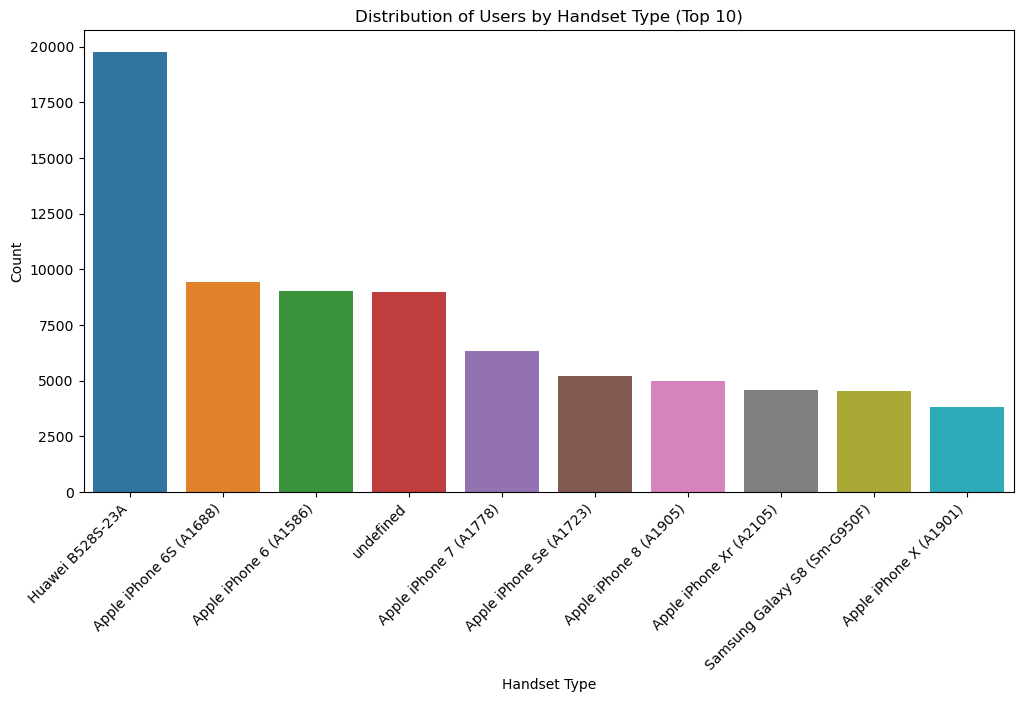

In [25]:
# Summary statistics
summary_statistics = mydata.describe()

# Distribution of Users by Handset Type (Top 10)
top_handsets = mydata['Handset Type'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_handsets.index, y=top_handsets.values)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Users by Handset Type (Top 10)')
plt.xlabel('Handset Type')
plt.ylabel('Count')
plt.show()

/home/habte/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


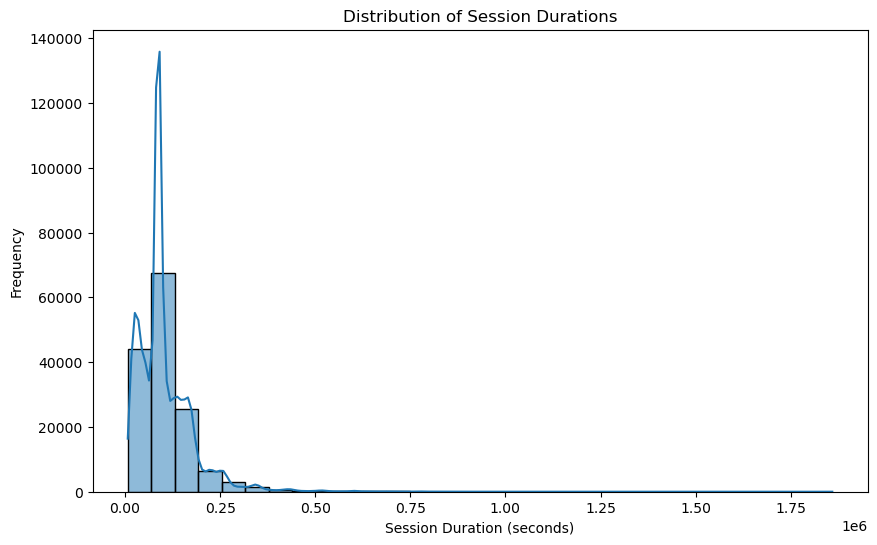

In [26]:
# Distribution of Session Durations
plt.figure(figsize=(10, 6))
sns.histplot(mydata['Session_Duration'], bins=30, kde=True)
plt.title('Distribution of Session Durations')
plt.xlabel('Session Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

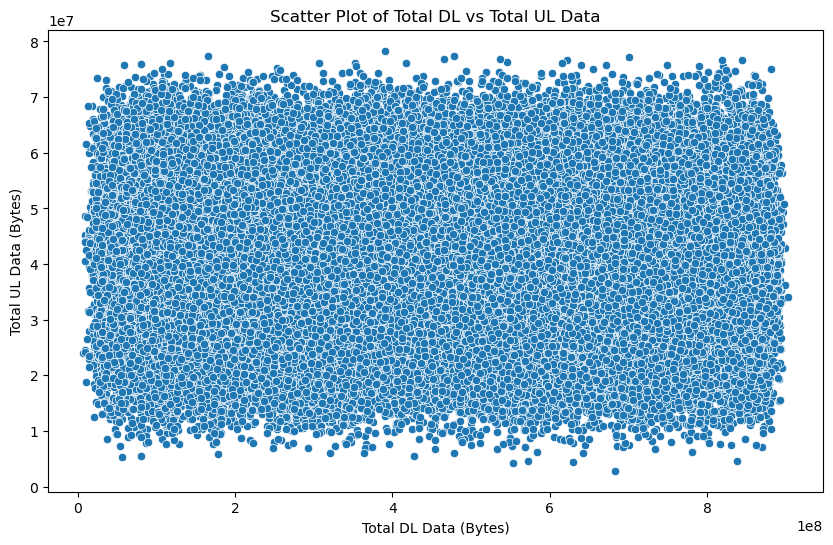

In [27]:
# Scatter plot of Total DL vs Total UL data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total DL (Bytes)', y='Total UL (Bytes)', data=mydata)
plt.title('Scatter Plot of Total DL vs Total UL Data')
plt.xlabel('Total DL Data (Bytes)')
plt.ylabel('Total UL Data (Bytes)')
plt.show()

In [29]:
# Identify columns with mixed data types
mixed_data_columns = mydata.select_dtypes(include='object').columns
print(f'Columns with mixed data types: {mixed_data_columns}')


Columns with mixed data types: Index(['Last Location Name', 'Handset Manufacturer', 'Handset Type'], dtype='object')


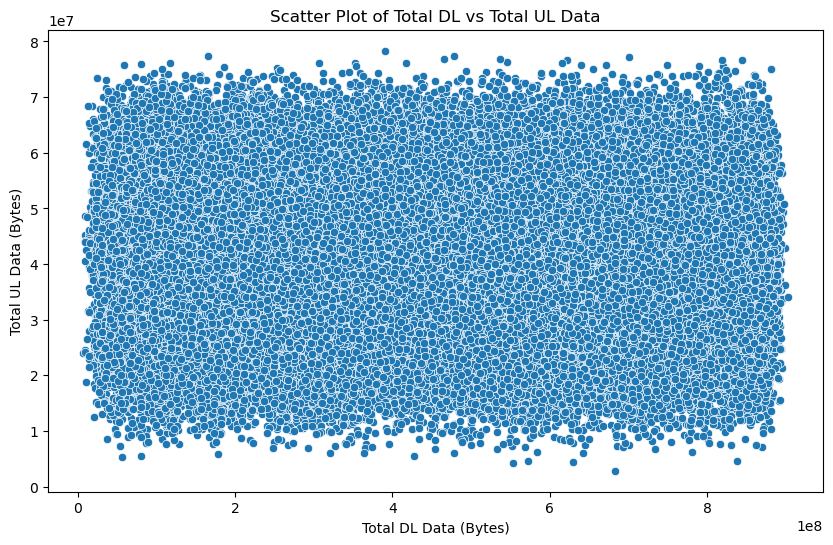

In [32]:
# Scatter plot of Total DL vs Total UL data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total DL (Bytes)', y='Total UL (Bytes)', data=mydata)
plt.title('Scatter Plot of Total DL vs Total UL Data')
plt.xlabel('Total DL Data (Bytes)')
plt.ylabel('Total UL Data (Bytes)')
plt.show()


In [33]:
# Summary statistics
summary_statistics = mydata.describe()

# Distribution of Users by Handset Type (Top 10)
top_handsets = mydata['Handset Type'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_handsets.values, y=top_handsets.index, orient='h')
plt.title('Distribution of Users by Handset Type (Top 10)')
plt.xlabel('Count')
plt.ylabel('Handset Type')
plt.show()

/home/habte/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


In [18]:
# Analyze basic metrics
basic_metrics = mydata.describe()


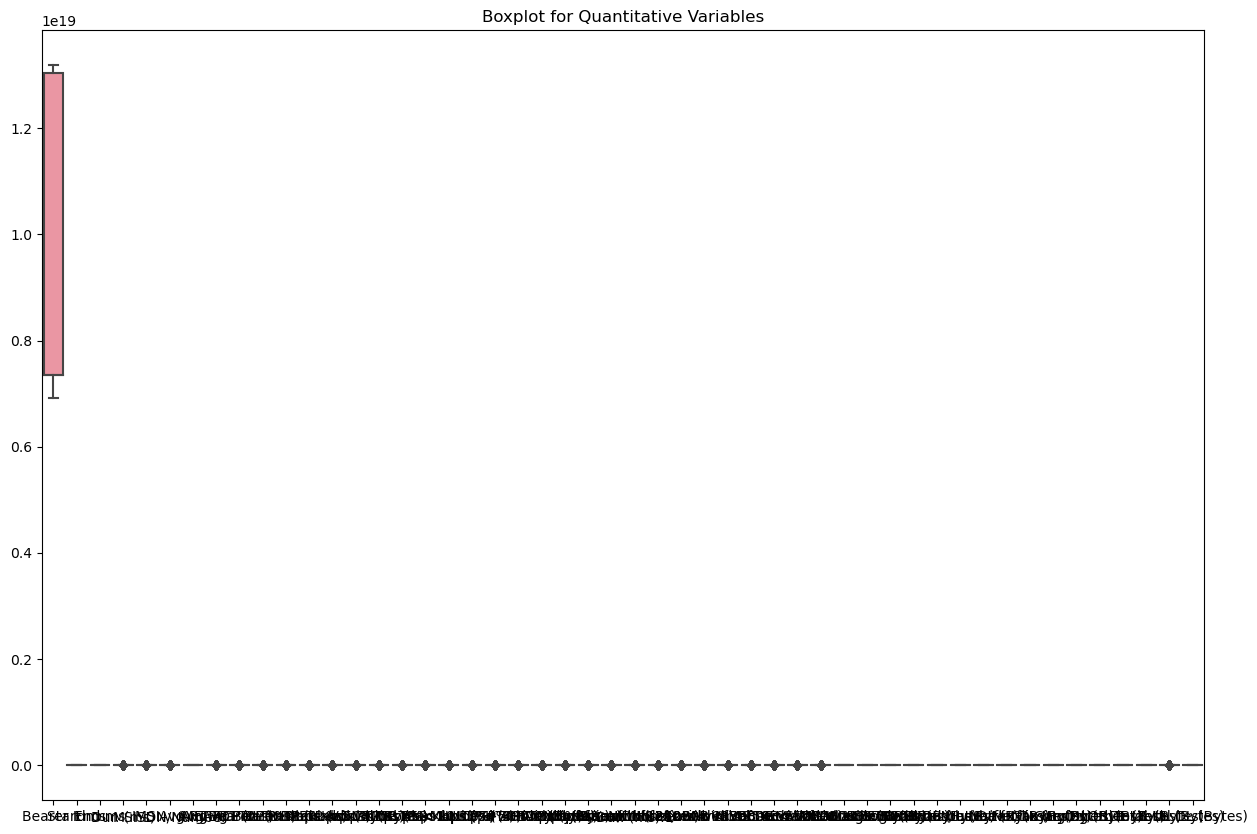

In [20]:
# Non-Graphical Univariate Analysis
dispersion_parameters = mydata.describe().loc[['std', 'min', '25%', '50%', '75%', 'max']]
# Graphical Univariate Analysis
# Choose suitable plotting options for each variable
plt.figure(figsize=(15, 10))
sns.boxplot(data=mydata.select_dtypes(include=['float64']))
plt.title('Boxplot for Quantitative Variables')
plt.show()


/tmp/ipykernel_4179/2682171044.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['Total DL+UL Data'] = subset_data['Total DL (Bytes)'] + subset_data['Total UL (Bytes)']


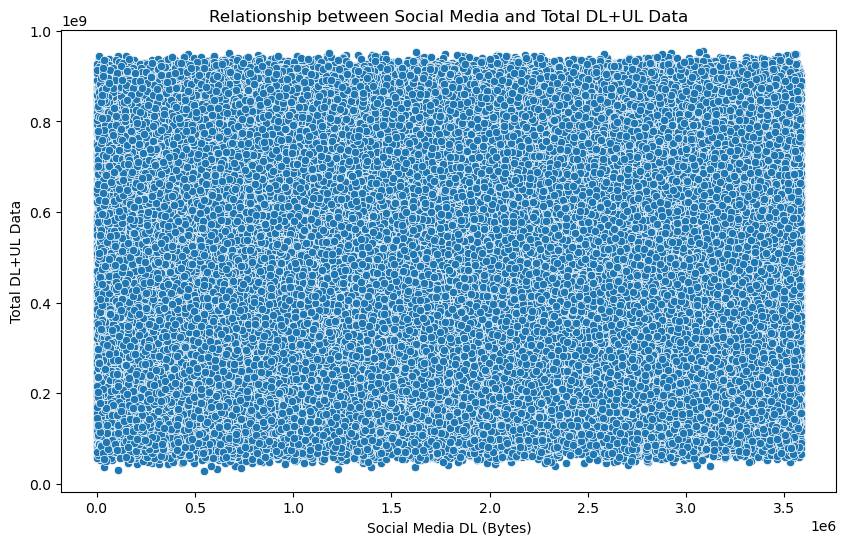

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns


application = 'Social Media'

# Select relevant columns
subset_data = mydata[[f'{application} DL (Bytes)', f'{application} UL (Bytes)', 'Total DL (Bytes)', 'Total UL (Bytes)']]

# Create a new column for the total DL+UL data
subset_data['Total DL+UL Data'] = subset_data['Total DL (Bytes)'] + subset_data['Total UL (Bytes)']

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=f'{application} DL (Bytes)', y='Total DL+UL Data', data=subset_data)
plt.title(f'Relationship between {application} and Total DL+UL Data')
plt.xlabel(f'{application} DL (Bytes)')
plt.ylabel('Total DL+UL Data')
plt.show()


In [22]:
# Aggregate metrics per customer (MSISDN)
customer_engagement = mydata.groupby('MSISDN/Number').agg({
    'Bearer Id': 'count',
    'Dur. (ms)': 'sum',
    'Total UL (Bytes)': 'sum',
    'Total DL (Bytes)': 'sum'
}).reset_index()

# Rename columns for clarity
customer_engagement.columns = ['MSISDN', 'Session Count', 'Total Duration', 'Total UL (Bytes)', 'Total DL (Bytes)']

# Calculate additional metrics
customer_engagement['Total Traffic (Bytes)'] = customer_engagement['Total UL (Bytes)'] + customer_engagement['Total DL (Bytes)']

# Report the top 10 customers per engagement metric
top_10_session_count = customer_engagement.sort_values(by='Session Count', ascending=False).head(10)
top_10_duration = customer_engagement.sort_values(by='Total Duration', ascending=False).head(10)
top_10_total_traffic = customer_engagement.sort_values(by='Total Traffic (Bytes)', ascending=False).head(10)

# Display the results
print("Top 10 Customers by Session Count:")
print(top_10_session_count[['MSISDN', 'Session Count']])
print("\nTop 10 Customers by Total Duration:")
print(top_10_duration[['MSISDN', 'Total Duration']])
print("\nTop 10 Customers by Total Traffic:")
print(top_10_total_traffic[['MSISDN', 'Total Traffic (Bytes)']])


Top 10 Customers by Session Count:
             MSISDN  Session Count
13526  3.362632e+10             18
13180  3.362578e+10             17
6437   3.361489e+10             17
37052  3.365973e+10             16
76363  3.367588e+10             15
92923  3.376054e+10             15
65118  3.366716e+10             13
92577  3.376041e+10             12
1279   3.360452e+10             12
666    3.360313e+10             12

Top 10 Customers by Total Duration:
             MSISDN  Total Duration
13180  3.362578e+10      18553754.0
6437   3.361489e+10       9966898.0
92923  3.376054e+10       9279434.0
13526  3.362632e+10       8791927.0
65118  3.366716e+10       8744914.0
50281  3.366284e+10       6614270.0
57160  3.366469e+10       6288730.0
666    3.360313e+10       6287761.0
66029  3.366746e+10       5649882.0
92577  3.376041e+10       5321667.0

Top 10 Customers by Total Traffic:
             MSISDN  Total Traffic (Bytes)
6437   3.361489e+10           8.846226e+09
92923  3.376054e+10      

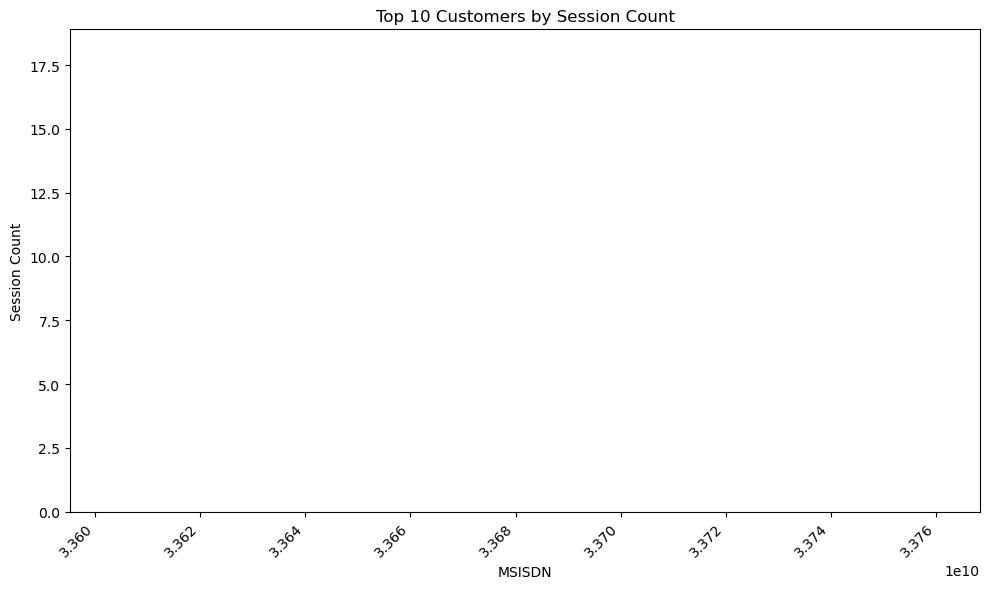

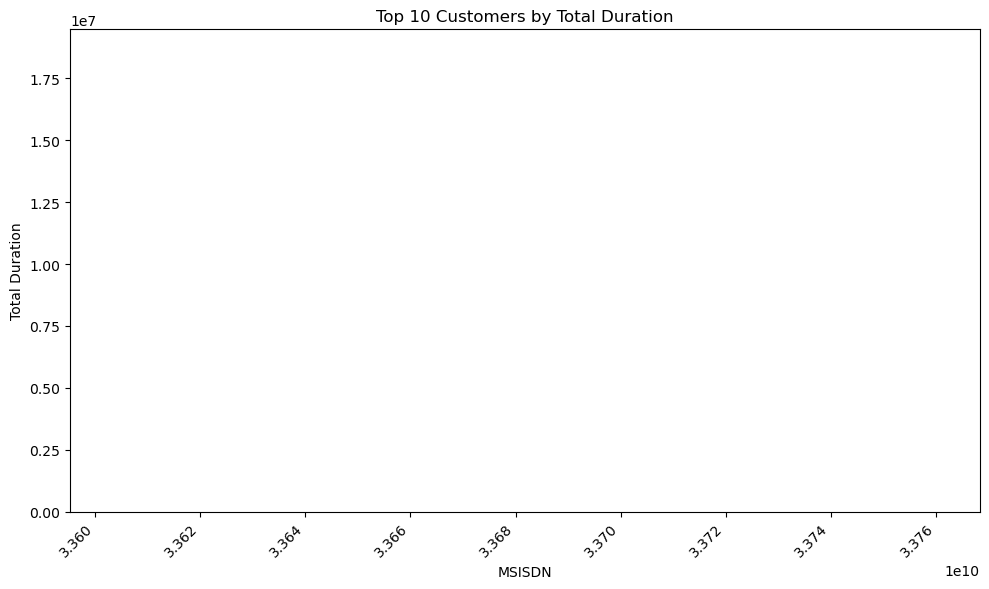

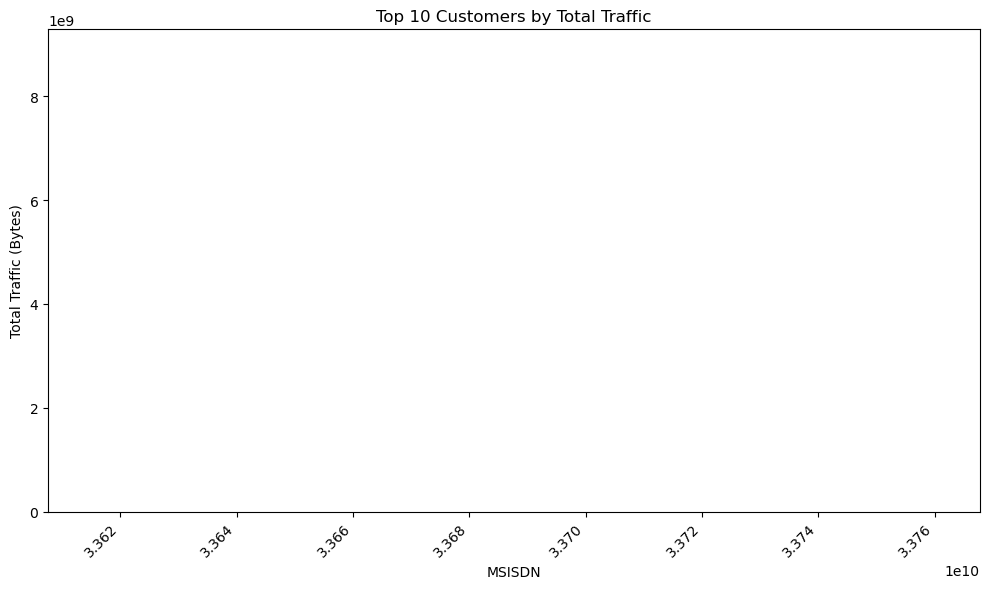

In [23]:
import matplotlib.pyplot as plt

# Plotting function
def plot_top_10(data, metric, title):
    plt.figure(figsize=(10, 6))
    plt.bar(data['MSISDN'], data[metric], color='skyblue')
    plt.xlabel('MSISDN')
    plt.ylabel(metric)
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Plot the top 10 customers by session count
plot_top_10(top_10_session_count, 'Session Count', 'Top 10 Customers by Session Count')

# Plot the top 10 customers by total duration
plot_top_10(top_10_duration, 'Total Duration', 'Top 10 Customers by Total Duration')

# Plot the top 10 customers by total traffic
plot_top_10(top_10_total_traffic, 'Total Traffic (Bytes)', 'Top 10 Customers by Total Traffic')


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Database connection parameters
db_params = {
    'dbname': 'week1',
    'user': 'postgres',
    'password': 'habte',
    'host': 'localhost',
    'port': '5432'
}

# Create a SQLAlchemy engine
engine = create_engine(f'postgresql+psycopg2://{db_params["user"]}:{db_params["password"]}@{db_params["host"]}:{db_params["port"]}/{db_params["dbname"]}')

# SQL query to retrieve data
sql_query = "SELECT * FROM xdr_data;"

# Read data from PostgreSQL into a DataFrame
mydata = pd.read_sql_query(sql_query, engine)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
imputed_data = imputer.fit_transform(mydata.select_dtypes(include=['float64']))

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(imputed_data)

# Perform PCA
pca = PCA()
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame with principal components
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, pca.n_components_ + 1)])

# Provide interpretation of the results (maximum four bullet points)
pca_interpretation = [
    "Principal components capture the variance in the data.",
    "Each principal component is a linear combination of the original features.",
    "The first few principal components explain a significant portion of the total variance.",
    "PCA is useful for dimensionality reduction and identifying patterns in high-dimensional data."
]

# Save the results to a PowerPoint presentation
from pptx import Presentation
from pptx.util import Inches
import os

# Create a PowerPoint presentation
presentation = Presentation()

# Function to add a slide with title and content
def add_slide(title, content):
    slide = presentation.slides.add_slide(presentation.slide_layouts[1])  # Use '1' for title and content slide
    title_box = slide.shapes.title
    content_box = slide.placeholders[1]
    title_box.text = title
    content_box.text = content

# Slide 1: Variable Description
variable_description = mydata.dtypes.reset_index()
variable_description.columns = ['Variable', 'Data Type']
add_slide("Variable Description", variable_description.to_string(index=False))

# Slide 2: Basic Metrics
basic_metrics = mydata.describe()
add_slide("Basic Metrics", basic_metrics.to_string())

# Slide 3: Non-Graphical Univariate Analysis
dispersion_parameters = mydata.describe().loc[['std', 'min', '25%', '50%', '75%', 'max']]
add_slide("Non-Graphical Univariate Analysis", dispersion_parameters.to_string())

# Slide 4: Graphical Univariate Analysis
image_path = 'univariate_analysis_plot.png'
plt.figure(figsize=(15, 10))
sns.boxplot(data=mydata.select_dtypes(include=['float64']))
plt.title('Boxplot for Quantitative Variables')
plt.savefig(image_path)
plt.close()
presentation.slides.add_slide(presentation.slide_layouts[5])  # Use '5' for blank slide
presentation.slides[-1].shapes.add_picture(image_path, Inches(1), Inches(1), width=Inches(8))
os.remove(image_path)  # Remove the temporary image file

# Slide 5: Bivariate Analysis
application_cols = ['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)',
                     'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)',
                     'Social Media UL (Bytes)', 'Google UL (Bytes)', 'Email UL (Bytes)',
                     'Youtube UL (Bytes)', 'Netflix UL (Bytes)', 'Gaming UL (Bytes)', 'Other UL (Bytes)']

total_data_cols = ['Total DL (Bytes)', 'Total UL (Bytes)']
bivariate_analysis = mydata[application_cols + total_data_cols].corr()
add_slide("Bivariate Analysis", bivariate_analysis.to_string())

# Slide 6: Variable Transformations
mydata['Total_Session_Duration'] = mydata['Dur. (ms).1'] / 1000  # Convert to seconds
mydata['Decile_Class'] = pd.qcut(mydata['Total_Session_Duration'], q=5, labels=False, duplicates='drop')
total_data_per_decile = mydata.groupby('Decile_Class')[total_data_cols].sum()
add_slide("Variable Transformations", total_data_per_decile.to_string())

# Slide 7: Correlation Analysis (Continued)
# (Continuation from the previous code snippet)
correlation_matrix = mydata[['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)',
                              'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)',
                              'Social Media UL (Bytes)', 'Google UL (Bytes)', 'Email UL (Bytes)',
                              'Youtube UL (Bytes)', 'Netflix UL (Bytes)', 'Gaming UL (Bytes)', 'Other UL (Bytes)']].corr()
add_slide("Correlation Analysis", correlation_matrix.to_string())

# Slide 8: Dimensionality Reduction - PCA Interpretation
add_slide("PCA Interpretation", "\n".join(pca_interpretation))

# Save the presentation
presentation.save("telecom_analysis_results.pptx")


In [20]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'mydata' and contains the required columns

# Task 3.1 - Aggregate metrics per customer id (MSISDN)
engagement_metrics = mydata.groupby('MSISDN/Number').agg({
    'Bearer Id': 'count',            # Session frequency
    'Dur. (ms).1': 'sum',            # Total session duration
    'Total UL (Bytes)': 'sum',       # Total upload traffic
    'Total DL (Bytes)': 'sum'        # Total download traffic
}).reset_index()

# Rename columns for clarity
engagement_metrics.columns = ['MSISDN', 'Session Frequency', 'Total Session Duration', 'Total UL Traffic', 'Total DL Traffic']

# Display the top 10 customers per engagement metric
top_10_session_frequency = engagement_metrics.sort_values(by='Session Frequency', ascending=False).head(10)
top_10_duration = engagement_metrics.sort_values(by='Total Session Duration', ascending=False).head(10)
top_10_ul_traffic = engagement_metrics.sort_values(by='Total UL Traffic', ascending=False).head(10)
top_10_dl_traffic = engagement_metrics.sort_values(by='Total DL Traffic', ascending=False).head(10)

print("Top 10 Customers by Session Frequency:")
print(top_10_session_frequency)

print("\nTop 10 Customers by Total Session Duration:")
print(top_10_duration)

print("\nTop 10 Customers by Total UL Traffic:")
print(top_10_ul_traffic)

print("\nTop 10 Customers by Total DL Traffic:")
print(top_10_dl_traffic)

# Normalize engagement metrics and run k-means clustering
scaler = StandardScaler()
normalized_metrics = scaler.fit_transform(engagement_metrics.iloc[:, 1:])

# Use k-means with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
engagement_metrics['Cluster'] = kmeans.fit_predict(normalized_metrics)

# Display cluster statistics
cluster_stats = engagement_metrics.groupby('Cluster').agg({
    'Session Frequency': ['min', 'max', 'mean', 'sum'],
    'Total Session Duration': ['min', 'max', 'mean', 'sum'],
    'Total UL Traffic': ['min', 'max', 'mean', 'sum'],
    'Total DL Traffic': ['min', 'max', 'mean', 'sum']
}).reset_index()

print("\nCluster Statistics:")
print(cluster_stats)

# Task 3.2 - Aggregate user total traffic per application
app_traffic = mydata.groupby('MSISDN/Number').agg({
    'Social Media DL (Bytes)': 'sum',
    'Google DL (Bytes)': 'sum',
    'Email DL (Bytes)': 'sum',
    'Youtube DL (Bytes)': 'sum',
    'Netflix DL (Bytes)': 'sum',
    'Gaming DL (Bytes)': 'sum',
    'Other DL (Bytes)': 'sum',
    'Social Media UL (Bytes)': 'sum',
    'Google UL (Bytes)': 'sum',
    'Email UL (Bytes)': 'sum',
    'Youtube UL (Bytes)': 'sum',
    'Netflix UL (Bytes)': 'sum',
    'Gaming UL (Bytes)': 'sum',
    'Other UL (Bytes)': 'sum'
}).reset_index()

# Display the top 10 most engaged users per application
top_10_social_media = app_traffic.sort_values(by='Social Media DL (Bytes) + Social Media UL (Bytes)', ascending=False).head(10)
top_10_youtube = app_traffic.sort_values(by='Youtube DL (Bytes) + Youtube UL (Bytes)', ascending=False).head(10)
top_10_gaming = app_traffic.sort_values(by='Gaming DL (Bytes) + Gaming UL (Bytes)', ascending=False).head(10)

print("\nTop 10 Most Engaged Users (Social Media):")
print(top_10_social_media)

print("\nTop 10 Most Engaged Users (YouTube):")
print(top_10_youtube)

print("\nTop 10 Most Engaged Users (Gaming):")
print(top_10_gaming)

# Task 3.3 - Plot the top 3 most used applications
top_3_apps = app_traffic.sum().nlargest(3)

plt.figure(figsize=(10, 6))
top_3_apps.plot(kind='bar', color='skyblue')
plt.title('Top 3 Most Used Applications')
plt.xlabel('Application')
plt.ylabel('Total Traffic (Bytes)')
plt.show()

# Task 3.4 - K-means clustering based on engagement metrics
# Assuming 'normalized_metrics' is already computed

# Use the Elbow Method to find the optimal value of k
inertia_values = []
possible_k_values = range(1, 11)

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_metrics)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(possible_k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


Top 10 Customers by Session Frequency:
             MSISDN  Session Frequency  Total Session Duration  \
13526  3.362632e+10                 18            8.791937e+09   
13180  3.362578e+10                 17            1.855376e+10   
6437   3.361489e+10                 17            9.966906e+09   
37052  3.365973e+10                 16            4.035436e+09   
76363  3.367588e+10                 15            4.865954e+09   
92923  3.376054e+10                 15            9.279442e+09   
65118  3.366716e+10                 13            8.744922e+09   
92577  3.376041e+10                 12            5.321674e+09   
1279   3.360452e+10                 12            5.207995e+09   
666    3.360313e+10                 12            6.287767e+09   

       Total UL Traffic  Total DL Traffic  
13526       669650721.0      7.301517e+09  
13180       729577380.0      7.770043e+09  
6437        689483001.0      8.156743e+09  
37052       624260321.0      7.081602e+09  
76363       58

/home/habte/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Cluster Statistics:
  Cluster Session Frequency                      Total Session Duration  \
                        min max      mean    sum                    min   
0       0                 2  18  4.401675  16295             66595562.0   
1       1                 1   4  2.162675  53191             18235797.0   
2       2                 0   2  1.005868  79020              7142988.0   

                                            Total UL Traffic               \
            max          mean           sum              min          max   
0  1.855376e+10  6.355639e+08  2.352857e+12       68496905.0  729577380.0   
1  1.573421e+09  2.095547e+08  5.153997e+12       23034394.0  197644172.0   
2  1.042254e+09  1.032608e+08  8.112064e+12        2866892.0  104650587.0   

                              Total DL Traffic                              \
           mean           sum              min           max          mean   
0  1.827919e+08  6.766955e+11      404647470.0  8.156743e+09 

KeyError: 'Social Media DL (Bytes) + Social Media UL (Bytes)'

In [28]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from kneed import KneeLocator

# Assume 'MSISDN/Number' is the customer identifier column
identifier_column = 'MSISDN/Number'

# Check the actual column names in your dataset
print(mydata.columns)

# Aggregate metrics per customer (MSISDN)
engagement_metrics = mydata.groupby(identifier_column)['Bearer Id'].agg(['count', 'sum', 'mean'])
engagement_metrics.columns = ['Session Frequency', 'Total Session Duration', 'Total Traffic']

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
engagement_metrics_imputed = imputer.fit_transform(engagement_metrics)

# Normalize each engagement metric
scaler = StandardScaler()
normalized_metrics = scaler.fit_transform(engagement_metrics_imputed)

# Check the length of DataFrames
print("Length of mydata:", len(mydata))
print("Length of normalized_metrics:", len(normalized_metrics))

# Run K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
engagement_clusters = kmeans.fit_predict(normalized_metrics)

# Check the length of the values array
print("Length of engagement_clusters:", len(engagement_clusters))

# Add the cluster labels to the original dataset
if len(mydata) == len(engagement_clusters):
    mydata['Engagement Cluster'] = engagement_clusters
else:
    print("Length mismatch! Unable to assign 'Engagement Cluster'.")

# Continue with the rest of your analysis


Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


/home/habte/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Length of engagement_clusters: 106856
Length mismatch! Unable to assign 'Engagement Cluster'.


In [29]:
print("Missing values in mydata:")
print(mydata.isnull().sum())

Missing values in mydata:
Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP

In [30]:
# Debugging data transformation
engagement_metrics = mydata.groupby(identifier_column)['Bearer Id'].agg(['count', 'sum', 'mean'])
print("Length of engagement_metrics:", len(engagement_metrics))

engagement_metrics_imputed = imputer.fit_transform(engagement_metrics)
print("Length of engagement_metrics_imputed:", len(engagement_metrics_imputed))

normalized_metrics = scaler.fit_transform(engagement_metrics_imputed)
print("Length of normalized_metrics:", len(normalized_metrics))


Length of engagement_metrics: 106856
Length of engagement_metrics_imputed: 106856
Length of normalized_metrics: 106856


In [31]:
print("Duplicate rows based on identifier column:")
print(mydata[mydata.duplicated(subset=identifier_column, keep=False)])

Duplicate rows based on identifier column:
           Bearer Id            Start  Start ms              End  End ms  \
0       1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1       1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
5       1.311448e+19  4/12/2019 21:37     439.0   4/25/2019 8:08   553.0   
7       1.304243e+19   4/14/2019 2:11     592.0   4/25/2019 2:26   512.0   
9       1.304243e+19   4/15/2019 0:32       0.0   4/25/2019 0:40   284.0   
...              ...              ...       ...              ...     ...   
149990  1.304243e+19   4/29/2019 7:28     438.0   4/30/2019 6:46    83.0   
149992  1.311448e+19   4/29/2019 7:28     114.0   4/30/2019 7:04   724.0   
149993  1.311448e+19   4/29/2019 7:28      79.0  4/30/2019 18:22   512.0   
149997  7.349883e+18   4/29/2019 7:28     483.0  4/30/2019 10:41   187.0   
150000           NaN             None       NaN             None     NaN   

        Dur. (ms)          IMSI  MSISDN/Numb

In [29]:
import pandas as pd

# Assuming 'MSISDN' is the user identifier column
# and you have columns for each application (e.g., 'Social Media DL (Bytes)', 'Google DL (Bytes)', etc.)
application_columns = ['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)',
                        'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)',
                        'Social Media UL (Bytes)', 'Google UL (Bytes)', 'Email UL (Bytes)',
                        'Youtube UL (Bytes)', 'Netflix UL (Bytes)', 'Gaming UL (Bytes)', 'Other UL (Bytes)']

# Step 1: Calculate Total Data for Each Application per User
total_data_per_user = mydata.groupby('MSISDN/Number')[application_columns].sum()

# Step 2: Calculate Engagement Metric (Total Data Usage)
total_data_per_user['Total Data Usage'] = total_data_per_user.sum(axis=1)

# Step 3: Rank Users Based on Engagement Metric
top_engaged_users = total_data_per_user.nlargest(10, 'Total Data Usage')

# Display the result
print(top_engaged_users)


               Social Media DL (Bytes)  Google DL (Bytes)  Email DL (Bytes)  \
MSISDN/Number                                                                 
3.361489e+10                27749744.0         93941708.0        33607211.0   
3.362632e+10                42743837.0        116106455.0        33404785.0   
3.362578e+10                26564121.0        107904739.0        31895412.0   
3.367588e+10                18655364.0         83002994.0        24284723.0   
3.365973e+10                34900444.0         90958549.0        29907647.0   
3.376054e+10                39297646.0         88626532.0        26437895.0   
3.366646e+10                18234924.0         62599213.0        19667181.0   
3.365836e+10                16865613.0         58671984.0        17553922.0   
3.360313e+10                22776679.0         73942055.0        20343728.0   
3.369879e+10                15390784.0         59943992.0        24165599.0   

               Youtube DL (Bytes)  Netflix DL (Byte

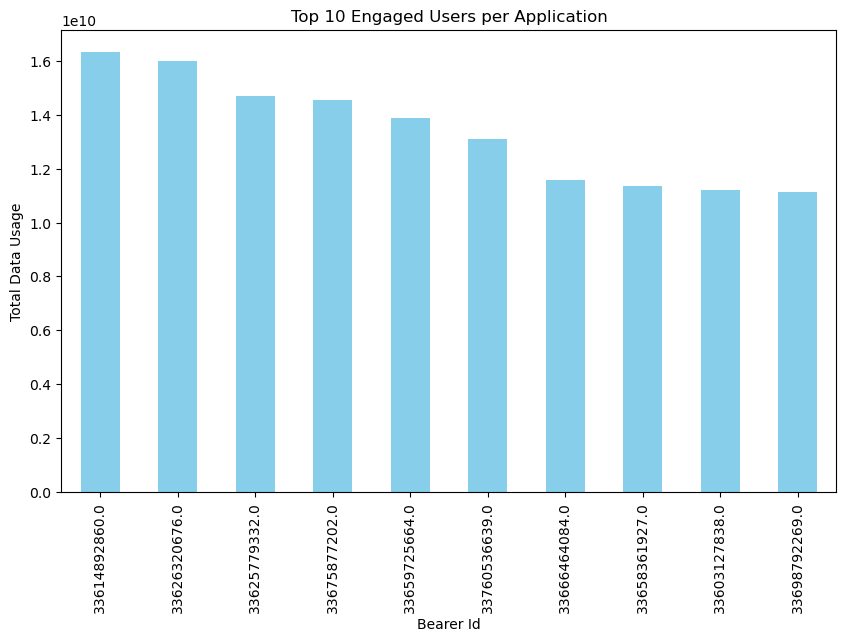

In [33]:
import matplotlib.pyplot as plt

# Assuming 'Total Data Usage' is the engagement metric column
# If you have a different column name, replace 'Total Data Usage' with the correct one
engagement_metric = 'Total Data Usage'

# Plotting the top engaged users
plt.figure(figsize=(10, 6))
top_engaged_users[engagement_metric].plot(kind='bar', color='skyblue')
plt.title('Top 10 Engaged Users per Application')
plt.xlabel('Bearer Id')
plt.ylabel(engagement_metric)
plt.show()


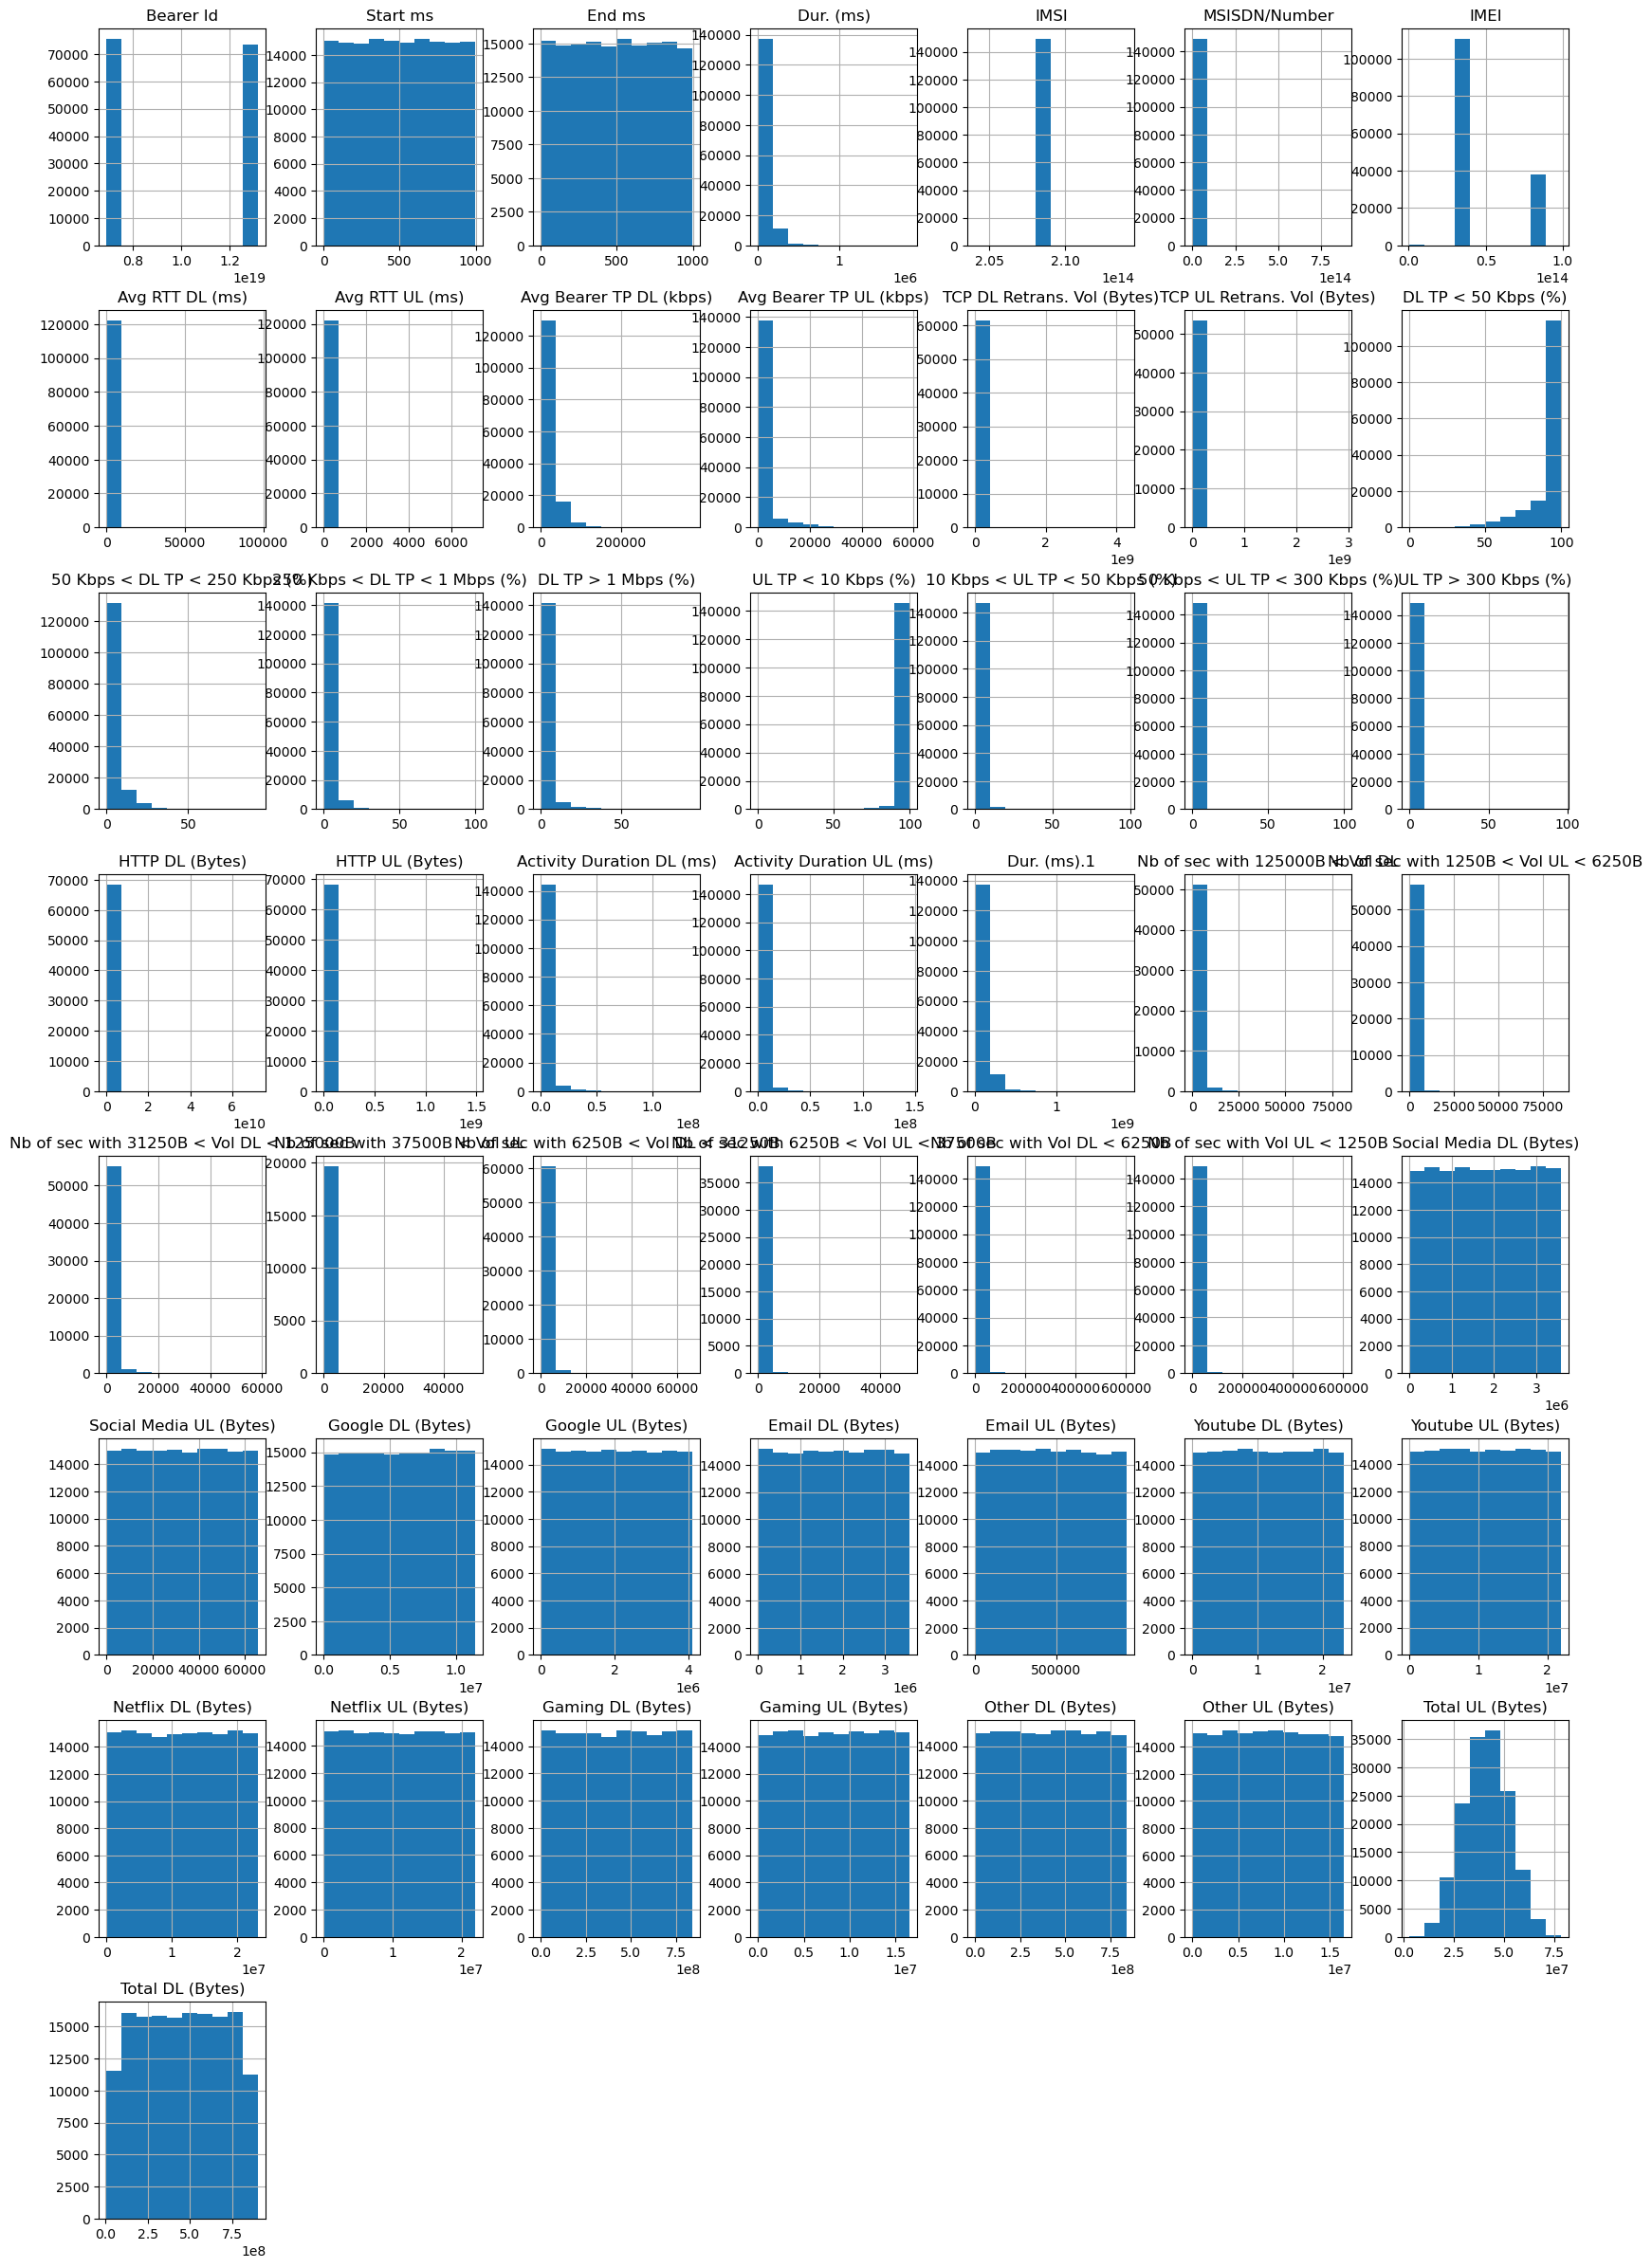

In [12]:
#Visualizing Data Distribution
mydata.hist(figsize=(20, 30))
plt.show()

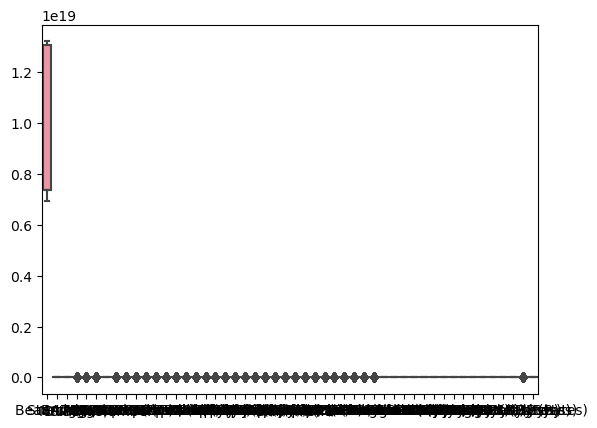

In [13]:
#Identify Outliers
sns.boxplot(data=mydata)
plt.show()